### Proyecto

#### Importar las librerías necesarias

In [5]:
%pip install pandas matplotlib numpy scikit-learn

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

  Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 768.9 kB/s  0:00:14 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 731.5 kB/s  0:00:10m0:00:0100:01
Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl (5.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 755.6 kB/s  0:00:14m0:00:0100:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 890.7 kB/s  0:00:03 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 773.6 kB/s  0:00:06 eta 0:00:01
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl 

#### Cargar set de datos

In [21]:
agua = pd.read_csv("datos/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv", encoding='latin1')
pd.set_option('display.max_columns', None)
agua

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,231.045,Alta,2350.0,Dudosa para riego,NaN,1545.8,Cultivos con manejo especial,Ligeramente salobres,<0.2,Baja,752.096,Muy dura e indeseable usos industrial y domesti

In [22]:
agua.dtypes

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_mg/L                float64
SDT_M_mg/L               object
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L           object
CALIDAD_FLUO             object
DUR_mg/L                 object
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL      object
CALIDAD_COLI_FEC         object
N_NO3_mg/L               object
CALIDAD_N_NO3            object
AS_TOT_mg/L              object
CALIDAD_AS               object
CD_TOT_mg/L              object
CALIDAD_CD               object
CR_TOT_mg/L              object
CALIDAD_

#### Escalado de datos
Se realiza cuando los datos tienen diferentes magnitudes de datos.

**StandardScaler** normaliza las variables, es decir, ajusta los valores para que tengan una media de 0 y una desviación estándar de 1. Esto ayuda a que el modelo de regresión logística funcione mejor, especialmente cuando las variables tienen diferentes escalas.

In [19]:
from sklearn.preprocessing import StandardScaler #Importar la librería de escalado.

scaler = StandardScaler() #Función para escalar variables

agua_escalada = scaler.fit_transform(agua) #Escalamos

agua_escalada

ValueError: could not convert string to float: 'DLAGU6'

#### Elegir el número de clusters

Para esto se puede utilizar el **Codo de Jambú**, que es un método gráfico utilizado para determinar el número óptimo de clusters en el algoritmo de k-means.

El Codo de Jambú consiste en identificar el punto en el gráfico donde la disminución del WCSS (suma de los errores cuadrados dentro de los clusters, que mide la dispersión o variabilidad dentro de cada cluster y se calcula como la suma de las distancias al cuadrado entre cada punto y el centroide del cluster al que pertenece.) comienza a ser menos significativa. Este punto se llama "codo" porque la curva suele tener una forma que se asemeja a un brazo doblado. El número de clusters óptimo es el valor de k en ese punto de inflexión.

In [ ]:
wcss = [] #Se crea una lista vacía llamada wcss, esto para ir almacenando los valores que se vayan calculando.

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 300) #Se crea un modelo con el método k-means, y se indica que la cantidad de clusters cambia conforme varía el valor de i, y que se hagan 300 iteraciones.
    kmeans.fit(agua_escalada) #Se aplica el modelo k-means al dataset.
    wcss.append(kmeans.inertia_) #Se obtiene el valor de wcss que está en inertia_, y se agrega a la lista vacía.

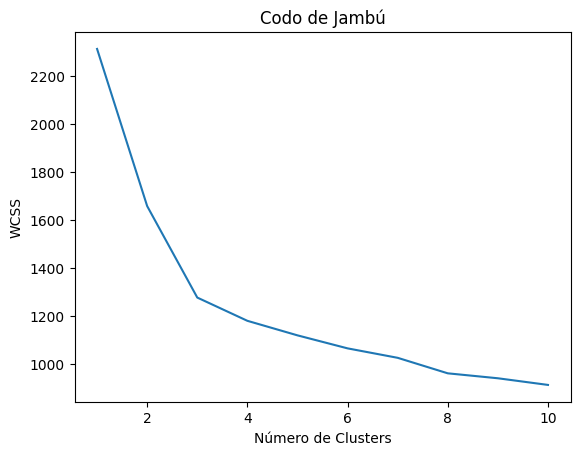

In [53]:
#Se visualiza el Codo de Jambú
plt.plot(range(1,11), wcss)
plt.title("Codo de Jambú")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS") #WCSS es un indicador de qué tan similares son los puntos dentro de los clusters.
plt.show()

#### Aplicando K-Means a los datos

In [ ]:
clustering = KMeans(n_clusters = 3, max_iter = 300) #Se crea el modelo con 3 clusters, según lo que apreciamos con la gráfica
clustering.fit(agua_escalada) #Se ajusta el modelo al dataset

KMeans(n_clusters=3)

#### Agregando la clasificación al archivo original

In [ ]:
agua['kmeans_clusters'] = clustering.labels_ #Los resultados del clustering se guardan en labels_ dentro del modelo
agua

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,kmeans_clusters
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,174,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,175,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,176,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,177,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


#### Visualizar los clusters que se formaron con PCA

Reduce la cantidad de variables a analizar, creando una menor cantidad de variables que represente lo mejor posible a las variables originales.

In [16]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2) #Como se quiere una visualización de 2 dimensiones, se crea un pca de 2 componentes
pca_agua = pca.fit_transform(agua_escalada) #Ajustamos el pca al dataset
pca_agua_df = pd.DataFrame(data = pca_agua, columns = ['Componente_1', 'Componente_2']) #Se genera un dataset con los componentes creados
pca_nombres_agua = pd.concat([pca_agua_df, agua[['kmeans_clusters']]], axis = 1) #Se le agrega al nuevo dataset con los componentes principales, la columna con los kmeans

pca_nombres_agua

,Componente_1,Componente_2,kmeans_clusters
0,3.316751,1.443463,0
1,2.209465,-0.333393,0
2,2.516740,1.031151,0
3,3.757066,2.756372,0
4,1.008908,0.869831,0
...,...,...,...
173,-3.370524,2.216289,2
174,-2.601956,1.757229,2
175,-2.677839,2.760899,2
176,-2.387017,2.297347,2


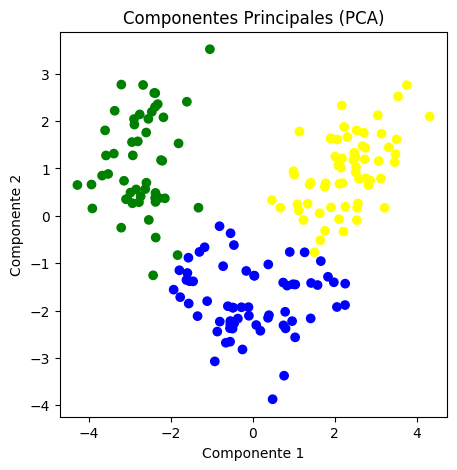

In [ ]:
fig = plt.figure(figsize = (5,5))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_title('Componentes Principales (PCA)')

color_theme = np.array(['yellow', 'blue', 'green'])
ax.scatter(x = pca_nombres_agua.Componente_1,
           y = pca_nombres_agua.Componente_2,
           c = color_theme[pca_nombres_agua.kmeans_clusters])

plt.show()